In [2]:
# execute this cell before continuing
import numpy as np
import matplotlib.pyplot as plt
#import seaborn as sns
from __future__ import division
%matplotlib inline
#sns.set_style('whitegrid')

# Coding the Solow model

Assume we have an economy where:

* The production function is Cobb-Douglas:

$$ Y_t = F_t(K_t,A_t,L_t) = K_t^\alpha (A_tL_t)^{(1-\alpha)} $$

* Capital accumulation is given by:

$$\dot{K_t}=sY_t - \delta K_t $$

   (yes, it is continous time but you are welcome to code it in discrete if that's your jam)

* Labour grows at rate $n$, technology grows at rate $g$. The usual.

## 1. Plotting the Solow model diagram

For this you'll need:

**1.1 Define a function that finds the steady-sate $k^{*}$, given parameters ($s$,$n$,$g$,$\delta$,$\alpha$)**

*Do I have to calculate it by hand?* 

Yes! Most of the time computer only do the boring part, the juicy part is faster done by you - like deriving the steady-state value.

In [3]:
def k_star(params):
    '''Input: 
       params: dictionary with params. Must contain values: s,alpha,n,g,delta
       
       Output:
       k_star, float number'''
    
    k_star = (params['s']/(params['delta']+params['g']+params['n']))**(1.0/(1-params['alpha']))
    return k_star

**1.2 Define a vector of $k$ values. **

It can be from 0 to 5 in increments of 0.01 to start with. You can always change it later.

In [29]:
k_vec = np.arange(0,5,0.01)

**1.3 Define two functions: $sf(k)$ and $(n+g+\delta)k$**

Why? For plotting of course! Remember to add $k$ as an input.

In [6]:
def investment_line(ks,params):
    '''Inputs:
       ks: vector of k values
       params: dictionary with parameter values. Must contain at least alpha and s
       
       Output:
       A vector of the same length as ks with the value of sf(k)
       
       '''
    inv_vec = params['s']*(ks)**params['alpha']
    
    return inv_vec

def depreciation_line(ks, params):
    '''Inputs:
       ks: vector of k values
       params: dictionary with parameter values. Must contain at least alpha and s
       
       Output:
       A vector of the same length as ks with the value of sf(k)
       
       '''
    dep_vec = (params['delta']+params['g']+params['n'])*ks
    
    return dep_vec

**1.4 Define your parameters**

These will depend on how you defined your functions: Are the inputs numbers? You went fancy and use a dictionary?

Define your parameter values accordingly. And yeap, you can give it any value you like (subject to, you know, $\alpha<1$ etc)

In [7]:
my_pams = {'alpha':0.33, 'delta':0.05, 'n':0.02, 'g': 0.07, 's':0.2}

** 1.5 Plot the result! **

Use the functions you defined, the vector of ks and the parameters to plot:

* A line $sf(k)$
* A line $(n+g+\delta)k$
* A dot on the intersection (use `plt.scatter(x,y)`)

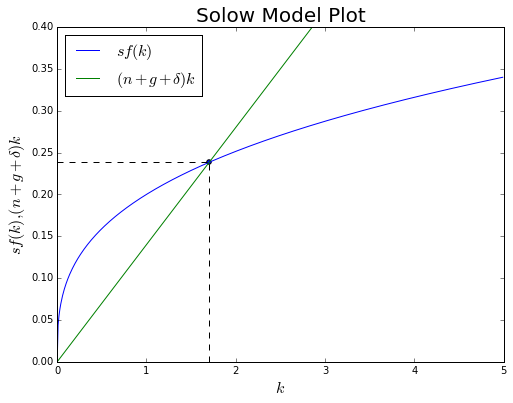

In [69]:
k_ss = k_star(my_pams)
ypoint = depreciation_line(k_ss,my_pams)

plt.figure(figsize=(8,6))
plt.plot(k_vec,investment_line(k_vec,my_pams),label='$sf(k)$')
plt.plot(k_vec,depreciation_line(k_vec,my_pams),label="$(n+g+\delta)k$")
plt.scatter(k_ss,ypoint)

plt.plot((k_ss,k_ss), (0,ypoint),ls='--',c='black')
plt.plot((0,k_ss), (ypoint,ypoint),ls='--',c='black')

plt.ylim(0,0.4)
plt.xlim(0,5)
plt.xlabel("$k$", fontsize=16)
plt.ylabel("$sf(k),(n+g+\delta)k$", fontsize=16)
plt.legend(loc='best', fontsize=16)
plt.title("Solow Model Plot", fontsize=20)
plt.show()

Try to change the parameters in cell 1.4 and re-execute 1.5 to see what happens!

Extra points given if:

* You labelled the axis
* You added a dashs lines marking the steady-state

> **Extra work:** can you make a plot showing what happens if $n$ increases (like in the first tutorial)? 


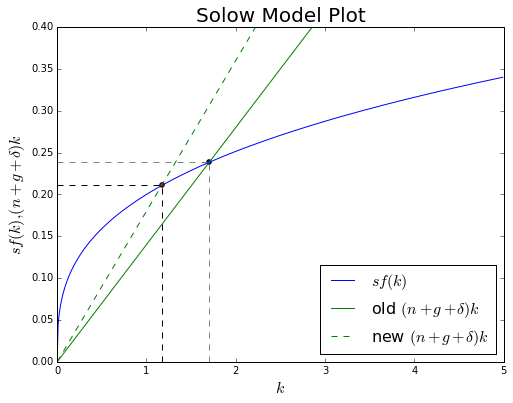

In [74]:
new_pams = {'alpha':0.33, 'delta':0.05, 'n':0.06, 'g': 0.07, 's':0.2}
k_ss_new = k_star(new_pams)
ypoint_new = depreciation_line(k_ss_new,new_pams)

plt.figure(figsize=(8,6))
plt.plot(k_vec,investment_line(k_vec,my_pams),label='$sf(k)$')
plt.plot(k_vec,depreciation_line(k_vec,my_pams),label="old $(n+g+\delta)k$")
plt.scatter(k_ss,ypoint)

plt.plot(k_vec,depreciation_line(k_vec,new_pams),label="new $(n+g+\delta)k$",c='green',ls='--')
plt.scatter(k_ss_new,ypoint_new, c='red')

plt.plot((k_ss,k_ss), (0,ypoint),ls='--',c='grey')
plt.plot((0,k_ss), (ypoint,ypoint),ls='--',c='grey')
plt.plot((k_ss_new,k_ss_new), (0,ypoint_new),ls='--',c='black')
plt.plot((0,k_ss_new), (ypoint_new,ypoint_new),ls='--',c='black')

plt.ylim(0,0.4)
plt.xlim(0,5)
plt.xlabel("$k$", fontsize=16)
plt.ylabel("$sf(k),(n+g+\delta)k$", fontsize=16)
plt.legend(loc='best', fontsize=16)
plt.title("Solow Model Plot", fontsize=20)
plt.show()

When coding on your own, it is always a good practice to:

1. Make a list of things you need (a function, another set of parameters, a plot line etc)
2. Plan how to do that in a piece of paper (pseudo code)
3. Code it!
---------------------------

## 2. Ploting a shock to $L_t$

Suppose the economy starts at $t=0$ in steady state, but at $t=10$, $L_t$ doubles overnight. All parameters remain unchanged.

Show a plot with the evolution of $k$ from $t=0$ to $t=100$. Has the economy gotten back to the steady state by t=100?

For this you'll need:

** 2.1 Define a function for $k_{t+1}(k_t)$**

In [96]:
def new_k(k, params):
    k_growth = params['s']*k**params['alpha'] - (params['delta']+params['g']+params['n'])*k
    return k + k_growth

**2.2 Create vector with the value of $k_t$ at all 100 points**

Remember: the first 9 should be all equal to $k^*$

In [115]:
k_irf = np.ones(9)*k_star(my_pams)
k_irf = np.hstack((k_irf,k_star(my_pams)/2))

In [116]:
for i in range(90):
    last_k = k_irf[-1]
    k_irf = np.hstack((k_irf,new_k(last_k,my_pams)))

**2.3 Plot your vector of $k$s (Impulse response function)**

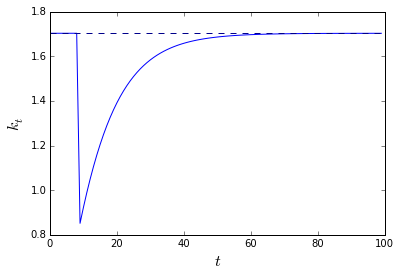

In [137]:
plt.plot(range(100),k_irf)
plt.axhline(k_ss,ls='--',c='darkblue')
plt.xlabel("$t$", fontsize=16)
plt.ylabel("$k_t$", fontsize=16)
plt.show()

> **Extra work:** Plot the impulse response function for output per effective worker too. Try to make subplots for each.

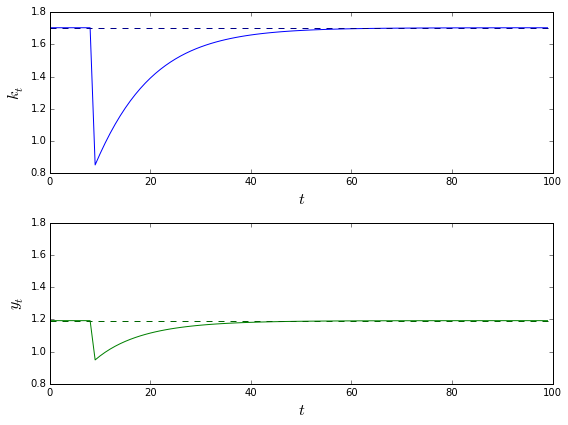

In [139]:
y_irf = k_irf**my_pams['alpha']

plt.figure(figsize=(8,6))
plt.subplot(211)
plt.plot(range(100),k_irf)
plt.axhline(k_ss,ls='--',c='darkblue')
plt.xlabel("$t$", fontsize=16)
plt.ylabel("$k_t$", fontsize=16)

plt.subplot(212)
plt.plot(range(100),y_irf,c='green')
plt.axhline(k_ss**my_pams['alpha'],ls='--',c='darkgreen')
plt.xlabel("$t$", fontsize=16)
plt.ylabel("$y_t$", fontsize=16)
plt.ylim(0.8,1.8)

plt.tight_layout()        # Super convenient function to fit the plots!
plt.show()

> **Extra work (hard mode):** Can you plot the evolution of output and capital **per worker** (in logs)?

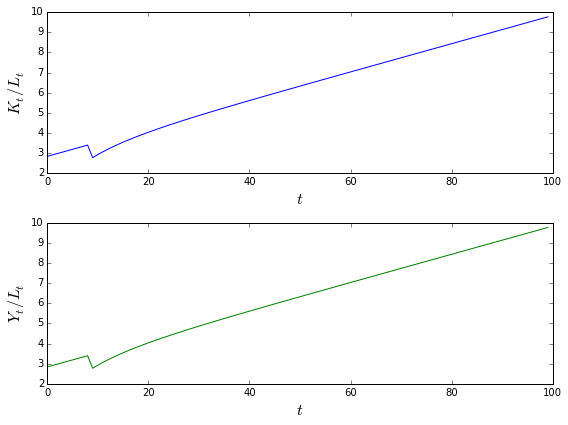

In [140]:
A_vec = np.array((10,))
for ir in range(99):
    A_vec = np.hstack((A_vec,A_vec[-1]*np.exp(my_pams['g'])))
KL_irf = np.log(k_irf*A_vec)
YL_irf = np.log(k_irf*A_vec)

plt.figure(figsize=(8,6))
plt.subplot(211)
plt.plot(range(100),KL_irf)
#plt.axhline(k_ss,ls='--',c='darkblue')
plt.xlabel("$t$", fontsize=16)
plt.ylabel("$K_t/L_t$", fontsize=16)

plt.subplot(212)
plt.plot(range(100),YL_irf,c='green')
#plt.axhline(k_ss**my_pams['alpha'],ls='--',c='darkgreen')
plt.xlabel("$t$", fontsize=16)
plt.ylabel("$Y_t/L_t$", fontsize=16)

plt.tight_layout()        # Super convenient function to fit the plots!
plt.show()

------------------

## 3. Encapsulating a plot inside a function

To keep the code clean, it is good practice to group a series of routines inside a function. Plotting easily lends itself to this - in python, not so much in matlab. But in matlab is common practice to encapsulate bits of code into functions too, so this exercise is useful anyway.

With the code from exercise 1, define a function that:

* Takes as inputs (1) a list or dictionary of old parameters, (2) the name of the parameter to shock and (3) the shock size.
* Gives as output a Solow model plot with the change.

I have written pseudo code to guide you. If you feel brave, erase it and do it from scratch yourself!

Tip: Copy pasting is your friend here.

Tip: It is preferable to use a dictionary better than a list. Can you guess why?

In [172]:
def Solow_shock(pams,pam_shock,shock_size):
    new_pams = pams.copy()
    new_pams[pam_shock] = new_pams[pam_shock]*shock_size
    k_ss_old = k_star(pams)
    k_ss_new = k_star(new_pams)
    ypoint_old = depreciation_line(k_ss_old,pams)
    ypoint_new = depreciation_line(k_ss_new,new_pams)  

    plt.figure(figsize=(8,6))
    plt.plot(k_vec,investment_line(k_vec,pams),label='$sf(k)$')
    plt.plot(k_vec,depreciation_line(k_vec,pams),label="old $(n+g+\delta)k$")
    plt.scatter(k_ss_old,ypoint_old)
    
    if pam_shock in ['n','g','delta','alpha']:
        plt.plot(k_vec,depreciation_line(k_vec,new_pams),label="new $(n+g+\delta)k$",c='green',ls='--')
    
    if pam_shock in ['alpha','s']:        
        plt.plot(k_vec,investment_line(k_vec,new_pams),label="new $sf(k)$",c='blue',ls='--')
    
    plt.scatter(k_ss_new,ypoint_new, c='red')

    plt.plot((k_ss,k_ss), (0,ypoint_old),ls='--',c='grey')
    plt.plot((0,k_ss), (ypoint,ypoint),ls='--',c='grey')
    plt.plot((k_ss_new,k_ss_new), (0,ypoint_new),ls='--',c='black')
    plt.plot((0,k_ss_new), (ypoint_new,ypoint_new),ls='--',c='black')

    plt.ylim(0,0.4)
    plt.xlim(0,5)
    plt.xlabel("$k$", fontsize=16)
    plt.ylabel("$sf(k),(n+g+\delta)k$", fontsize=16)
    plt.legend(loc='best', fontsize=16)
    plt.title("Solow Model Plot: shock in "+pam_shock, fontsize=20)
    plt.show()

Practice your function below:

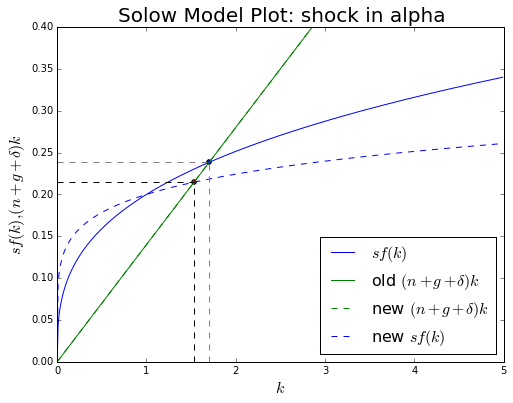

In [173]:
Solow_shock(my_pams,'alpha',0.5)

Careful with the indentation!

> **Extra work:** Add vertical and horizontal lines to mark the new steady-state (`plt.axhline`, `plt.axvline`)

> **Extra work:** Make the shock to be optional by giving (2) and (3) default values. For example:
> ```python
> def function_name(input1,input2=None):
> ```
                   
> Will make input 2 to have the value `None` by default. `None` is a diferent type of object (not a boolean or string or number). Useful for conditionals!

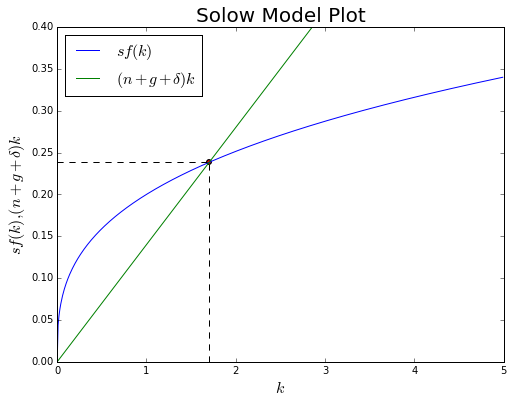

In [174]:
def Solow_shock(pams,pam_shock='alpha',shock_size=1):
    new_pams = pams.copy()
    new_pams[pam_shock] = new_pams[pam_shock]*shock_size
    k_ss_old = k_star(pams)
    k_ss_new = k_star(new_pams)
    ypoint_old = depreciation_line(k_ss_old,pams)
    ypoint_new = depreciation_line(k_ss_new,new_pams)  

    plt.figure(figsize=(8,6))
    plt.plot(k_vec,investment_line(k_vec,pams),label='$sf(k)$')
    plt.plot(k_vec,depreciation_line(k_vec,pams),label="$(n+g+\delta)k$")
    plt.scatter(k_ss_old,ypoint_old)
    
    if pam_shock in ['n','g','delta','alpha'] and shock_size != 1:
        plt.plot(k_vec,depreciation_line(k_vec,new_pams),label="new $(n+g+\delta)k$",c='green',ls='--')
    
    if pam_shock in ['alpha','s'] and shock_size != 1:        
        plt.plot(k_vec,investment_line(k_vec,new_pams),label="new $sf(k)$",c='blue',ls='--')
    
    plt.scatter(k_ss_new,ypoint_new, c='red')

    plt.plot((k_ss,k_ss), (0,ypoint_old),ls='--',c='grey')
    plt.plot((0,k_ss), (ypoint,ypoint),ls='--',c='grey')
    plt.plot((k_ss_new,k_ss_new), (0,ypoint_new),ls='--',c='black')
    plt.plot((0,k_ss_new), (ypoint_new,ypoint_new),ls='--',c='black')

    plt.ylim(0,0.4)
    plt.xlim(0,5)
    plt.xlabel("$k$", fontsize=16)
    plt.ylabel("$sf(k),(n+g+\delta)k$", fontsize=16)
    plt.legend(loc='best', fontsize=16)
    if shock_size!= 1:
        plt.title("Solow Model Plot: shock in "+pam_shock, fontsize=20)
    else:
        plt.title("Solow Model Plot", fontsize=20)
    plt.show()

# Showing you that it works:
Solow_shock(my_pams)

---------------

If you made it through this exercise, you should have learned:  

<form action="demo_form.asp" method="get">
  <p>&nbsp;</p>
  <input type="checkbox" name="vehicle" value="Bike"> How to add values to a vector using a defined function<br>
  <input type="checkbox" name="vehicle" value="Car" > How to encapsulate a plot into a function<br>
  <input type="checkbox" name="vehicle" value="Car" > How to plot IRFs<br>
</form>

Feel free to change or add content to this notebook.

***Next time: Neoclassical Model!***